<a href="https://colab.research.google.com/github/alexphil12/Energy-forcasting-UDLA/blob/main/Cnn_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()
import tensorflow as tf
import copy as cp

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random as rd

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/df_cov_continu_1_8.txt', index_col=0, parse_dates=True,sep=',')
N=len(list(df.iloc[:,3]))
df_train=df.iloc[0:round(N*0.8),:]
df_test=df.iloc[round(N*0.8):N,:]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
mesure=["Fecha","Hora"];
mesure.append("Voltaje_(R)_[V]")	
mesure.append("Voltaje_(S)_[V]")	
mesure.append("Voltaje_(T)_[V]")	
mesure.append("Voltaje_(RS)_[V]")	
mesure.append("Voltaje_(ST)_[V]")	
mesure.append("Voltaje_(TR)_[V]")	
mesure.append("Corriente_R_[A]")	
mesure.append("Corriente_S_[A]")	
mesure.append("Corriente_T_[A]")	
mesure.append("Potencia_R_[VA]")	
mesure.append("Potencia_S_[VA]")	
mesure.append("Potencia_T_[VA]")	
mesure.append("Potencia_R_[W]")	
mesure.append("Potencia_S_[W]")	
mesure.append("Potencia_T_[W]")	
mesure.append("Potencia_R_[VAR]")	
mesure.append("Potencia_S_[VAR]")	
mesure.append("Potencia_T_[VAR]")	
mesure.append("Corriente_N_[A]")	
mesure.append("Frecuencia_[Hz]")	
mesure.append("not_sure_1")	
mesure.append("not_sure_2")	
mesure.append("not_sure_3")	
mesure.append("Potencia_3F_[KVA]")	
mesure.append("Potencia_3F_[W]")	
mesure.append("Potencia_3F_[VAR]")	
mesure.append("Factor de Potencia")

In [ ]:
RSG_train = df_train[mesure[15]].values
RSG_test=df_test[mesure[15]].values
long=len(RSG_train)
long_test=len(RSG_test)
RSG_train_ima=df_train.loc[:,mesure[2:28]]
RSG_test_ima=df_test.loc[:,mesure[2:28]]
RSG_deco=RSG_train_ima.drop(columns=[mesure[3],mesure[4],mesure[5],mesure[6],mesure[7],mesure[8],mesure[9],mesure[10],mesure[14],mesure[15],mesure[16],mesure[17],mesure[18],mesure[19],mesure[23],mesure[24],mesure[25],mesure[26]],inplace=False)
RSG_deco_test=RSG_test_ima.drop(columns=[mesure[3],mesure[4],mesure[5],mesure[6],mesure[7],mesure[8],mesure[9],mesure[10],mesure[14],mesure[15],mesure[16],mesure[17],mesure[18],mesure[19],mesure[23],mesure[24],mesure[25],mesure[26]],inplace=False)
RSG_train_ima=RSG_train_ima.loc[:,["Potencia_3F_[W]","not_sure_3","Potencia_3F_[KVA]","Corriente_T_[A]","Potencia_R_[VA]","Potencia_T_[VA]","Corriente_R_[A]","Potencia_S_[VA]","Potencia_T_[VAR]","Corriente_S_[A]"]]
RSG_test_ima=RSG_test_ima.loc[:,["Potencia_3F_[W]","not_sure_3","Potencia_3F_[KVA]","Corriente_T_[A]","Potencia_R_[VA]","Potencia_T_[VA]","Corriente_R_[A]","Potencia_S_[VA]","Potencia_T_[VAR]","Corriente_S_[A]"]]
scaler_im=MinMaxScaler()
scaler_im.fit(RSG_train_ima)
scaler_deco=MinMaxScaler()
scaler_deco.fit(RSG_deco)
RSG_train_ima_scaled=scaler_im.transform(RSG_train_ima)
RSG_test_ima_scaled=scaler_im.transform(RSG_test_ima)
RSG_train_deco_scaled=scaler_deco.transform(RSG_deco)
RSG_test_deco_scaled=scaler_deco.transform(RSG_deco_test)
taille_image=20
Q_ima=long-taille_image
Q_test_ima=long_test-taille_image
Image_data=np.zeros((taille_image,10,Q_ima-1))
Image_data_test=np.zeros((taille_image,10,Q_test_ima-1))
Image_data_deco=np.zeros((taille_image,8,Q_ima-1))
Image_data_test_deco=np.zeros((taille_image,8,Q_test_ima-1))

Y_ima=[]
Y_ima_test=[]

In [ ]:
for j in range(Q_ima-1):
  Image_data[:,:,j]=RSG_train_ima_scaled[j:taille_image+j,:]
  Image_data_deco[:,:,j]=RSG_train_deco_scaled[j:taille_image+j,:]
  Y_ima.append(RSG_train[j+taille_image+1])
for j in range(Q_test_ima-1):
  Image_data_test[:,:,j]=RSG_test_ima_scaled[j:taille_image+j,:]
  Image_data_test_deco[:,:,j]=RSG_test_deco_scaled[j:taille_image+j,:]
  Y_ima_test.append(RSG_test[j+taille_image+1])

In [ ]:
scalerY=MinMaxScaler()
Y_ima=np.array(Y_ima)
Y_ima_test=np.array(Y_ima_test)
scalerY.fit(Y_ima.reshape(-1,1))
Y_ima_scaled=scalerY.transform(Y_ima.reshape(-1,1))
Y_ima_test_scaled=scalerY.transform(Y_ima_test.reshape(-1,1))

In [ ]:

window_len=2500
Q=long-window_len
Q_test=long_test-window_len
Spectro=np.zeros((1000,11,Q-1))
Spectro_test=np.zeros((1000,11,Q_test-1))
Y=[]
Y_test=[]

In [ ]:

scalers=[]
for j in range(Q-1):
  f, t, Sxx = signal.spectrogram(RSG_train[0+j:window_len+j], fs=1/120,nfft=2**13)
  inter=20*np.log10(cp.deepcopy(Sxx[0:1000,:]))
  Spectro[:,:,j]=inter
  Y.append(RSG_train[window_len+j])
  #plt.pcolormesh(t, f[0:1000], Spectro[:,:,j],cmap='jet')
  #plt.ylabel('Frequency [Hz]')
  #plt.xlabel('Time [sec]')
  #plt.show()
for j in range(Q_test-1):
  f, t, Sxx = signal.spectrogram(RSG_test[0+j:window_len+j], fs=1/120,nfft=2**13)
  inter=20*np.log10(cp.deepcopy(Sxx[0:1000,:]))
  Spectro_test[:,:,j]=inter
  Y_test.append(RSG_test[window_len+j])
min=np.min(Spectro)
max=np.max(Spectro)
Spec_scaled=(-1/(min-max))*(Spectro-max)+1
min1=np.min(Spectro_test)
max1=np.max(Spectro_test)
Spec_test_scaled=(-1/(min1-max1))*(Spectro_test-max1)+1
Y = np.array(Y)
Y_test=np.array(Y_test)
scaler=MinMaxScaler()
scaler.fit(Y.reshape(-1,1))  
Y_scaled=scaler.transform(Y.reshape(-1,1))
Y_test_scaled=scaler.transform(Y_test.reshape(-1,1))
  
  

In [ ]:
def autocorr_matrix(x,order):
    R = np.zeros((order, order))
    for i in range(0,order):
        for j in range(0,order):
            R[i,j] = autocorrelate(x, abs(i-j))
    return R
def autocorrelate(x,lag):
    return np.correlate(x[0:len(x)-lag],x[lag:len(x)])

In [ ]:
taille=30
longueur=len(RSG_train)
longueur_test=len(RSG_test)

In [ ]:
autocor=np.zeros((taille,taille,longueur-taille))
autocor_test=np.zeros((taille,taille,longueur_test-taille))

In [ ]:
y_auto=[]
y_auto_test=[]
for j in range(longueur-taille):
  sig=RSG_train[j:j+taille]
  Auto_inter=autocorr_matrix(sig,taille)
  autocor[:,:,j]=Auto_inter
  y_auto.append(RSG_train[(j+taille)])
for j in range(longueur_test-taille):
  sig=RSG_test[j:j+taille]
  Auto_inter=autocorr_matrix(sig,taille)
  autocor_test[:,:,j]=Auto_inter
  y_auto_test.append(RSG_train[(j+taille)])
y_auto=np.array(y_auto)
y_auto_test=np.array(y_auto_test)
scaler2=MinMaxScaler()
scaler2_test=MinMaxScaler()
scaler2.fit(y_auto.reshape(-1,1))
scaler2_test.fit(y_auto_test.reshape(-1,1))
y_auto_scaled=scaler2.transform(y_auto.reshape(-1,1))
y_auto_test_scaled=scaler2_test.transform(y_auto_test.reshape(-1,1))
min_a=np.amin(autocor)
max_a=np.amax(autocor)
autocor_scaled=(-1/(min_a-max_a))*(autocor-max_a)+1
min_a_test=np.amin(autocor_test)
max_a_test=np.amax(autocor_test)
autocor_test_scaled=(-1/(min_a_test-max_a_test))*(autocor_test-max_a_test)+1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Spec_scaled = np.array(Spec_scaled).reshape(Q-1,1000,11,1)
Spec_test_scaled=np.array(Spec_test_scaled).reshape(Q_test-1,1000,11,1)
Image_data=np.array(Image_data).reshape(Q_ima-1,taille_image,10,1)
print(Image_data_test.shape)
Image_data_test=np.array(Image_data_test).reshape(Q_test_ima-1,taille_image,10,1)
Image_data_deco=np.array(Image_data_deco).reshape(Q_ima-1,taille_image,8,1)
Image_data_test_deco=np.array(Image_data_test_deco).reshape(Q_test_ima-1,taille_image,8,1)

(20, 10, 2951)


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(taille_image, 10, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

In [ ]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(taille_image, 8, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

In [ ]:
N=100
#plt.figure(figsize=(7,5))
#plt.pcolormesh(Spectro[0,:,:],cmap='jet')
#plt.colorbar

In [ ]:
autocor_scaled=autocor_scaled.reshape(11858,30,30)
autocor_test_scaled=autocor_test_scaled.reshape(2942,30,30)
cnn.compile(optimizer='adam',loss='mse')
cnn2.compile(optimizer='adam',loss='mse')
cnn.fit(Image_data,Y_ima_scaled,epochs=50, verbose=1,batch_size=100,validation_data=(Image_data_test,Y_ima_test_scaled))
cnn2.fit(Image_data_deco,Y_ima_scaled,epochs=50,verbose=1,batch_size=100,validation_data=(Image_data_test_deco,Y_ima_test_scaled))

Epoch 1/50
119/119 [==============================] - 10s 78ms/step - loss: 0.0496 - val_loss: 0.0553
Epoch 2/50
119/119 [==============================] - 5s 39ms/step - loss: 0.0405 - val_loss: 0.0583
Epoch 3/50
119/119 [==============================] - 5s 42ms/step - loss: 0.0405 - val_loss: 0.0593
Epoch 4/50
119/119 [==============================] - 5s 42ms/step - loss: 0.0401 - val_loss: 0.0523
Epoch 5/50
119/119 [==============================] - 3s 25ms/step - loss: 0.0401 - val_loss: 0.0498
Epoch 6/50
119/119 [==============================] - 3s 26ms/step - loss: 0.0398 - val_loss: 0.0557
Epoch 7/50
119/119 [==============================] - 3s 25ms/step - loss: 0.0397 - val_loss: 0.0600
Epoch 8/50
119/119 [==============================] - 4s 30ms/step - loss: 0.0398 - val_loss: 0.0623
Epoch 9/50
119/119 [==============================] - 5s 46ms/step - loss: 0.0399 - val_loss: 0.0581
Epoch 10/50
119/119 [==============================] - 4s 32ms/step - loss: 0.0397 - val_l

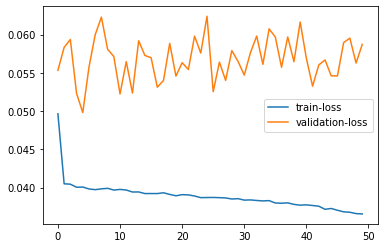

In [ ]:
loss_per_epoch = cnn.history.history['loss']
loss_vall=cnn.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

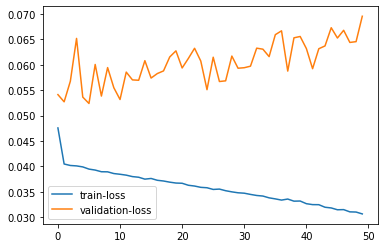

In [ ]:
loss_per_epoch = cnn2.history.history['loss']
loss_vall=cnn2.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [ ]:
trainPredict = cnn.predict(Image_data)
trainPredict2=cnn2.predict(Image_data_deco)
Y_true=scalerY.inverse_transform(trainPredict.reshape(-1,1))
Y_true_deco=scalerY.inverse_transform(trainPredict2.reshape(-1,1))
RSG_train=RSG_train.tolist()
Y_true=Y_true.tolist()
Y_true_deco=Y_true_deco.tolist()

In [ ]:
Q=0
N=1000

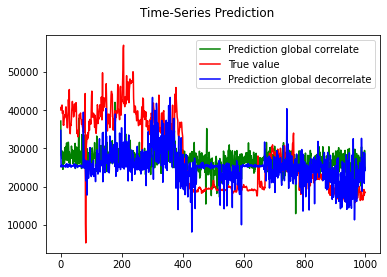

In [ ]:
plt.suptitle('Time-Series Prediction')
plt.plot(range(len(Y_true[Q:Q+N])),Y_true[Q:Q+N],label='Prediction global correlate',c="green")
plt.plot(range(len(Y_true[Q:Q+N])),RSG_train[Q:Q+N],label='True value',c="red")
plt.plot(range(len(Y_true[Q:Q+N])),Y_true_deco[Q:Q+N],label='Prediction global decorrelate',c="blue")
plt.legend()
plt.show()